# Proyecto del Día 18 - Analizar una Base de Datos de Perros

Hoy vamos a realizar un proyecto muy entretenido, que consiste en conseguir un dataset sobre razas de perros, que se encuentra alojada en el sitio [The Dog Api](https://thedogapi.com/).

Tu misión consiste en lograr obtener un dataset que contiene información sobre razas de perro ("breeds"), y crear visualizaciones que permitan responder algunas preguntas sobre la **expectativa de vida**, y el **temperamento** más frecuente entre todas las **razas**.


### Preguntas a responder
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?

### Pasos sugeridos para llegar hasta la respuesta
1. Descarga las **librerías** necesarias.
2. Explora el sitio [https://thedogapi.com/](https://thedogapi.com/) para identificar dónde y cómo se describe el funcionamiento de su API. Identifica la **API específica** con información sobre **razas** ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un **DataFrame** de Pandas.
*Nota: como todo sitio nuevo al que enfrentes, deberás resolver desafíos particulares. En este caso presta atención a las instrucciones que mencionan algo sobre cómo usar los mismos protocolos que se utilizan en la API de gatos de la misma organización*.
3. Realiza un **análisis exploratorio** para conocer la estrucutra y calidad de tus datos.
4. Implementa la **limpieza de datos** que consideres necesaria.
5. Crea los **gráficos** que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.

Te deseo mucho aprendizaje, pero sobre todo, mucha diversión.
¡Adelante!

## INSTALACION DE PAQUETES 

In [147]:
import requests
import pandas as pd
import numpy as np 
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns

## EJEMPLO DE EXTRACCIÓN DE API CON PARÁMETROS

### DECLARACION DE PARAMETROS

In [21]:
url = "https://api.thecatapi.com/v1/images/search"
params={ "x-api-key":"live_a1zkzhe66JZ3Mi1tk4A67UzwfdAY4UEBienzwFV6WOlFv9nblF2oJJVodP9SFUXW",
            "limit":20, "has_breeds" : 1}

### OBTENCION DE DATOS 

In [17]:
respuesta = requests.get(url,params)
data = respuesta.json()
data

[{'id': 'wgoLPWPZQ',
  'url': 'https://cdn2.thecatapi.com/images/wgoLPWPZQ.jpg',
  'width': 1200,
  'height': 931},
 {'id': 'HT902S6ra',
  'url': 'https://cdn2.thecatapi.com/images/HT902S6ra.jpg',
  'width': 1600,
  'height': 1200},
 {'id': 'Rscv6E1c5',
  'url': 'https://cdn2.thecatapi.com/images/Rscv6E1c5.jpg',
  'width': 1200,
  'height': 900},
 {'id': 'uk0SrrBbQ',
  'url': 'https://cdn2.thecatapi.com/images/uk0SrrBbQ.jpg',
  'width': 2329,
  'height': 2097},
 {'id': 'f_NV_6GZQ',
  'url': 'https://cdn2.thecatapi.com/images/f_NV_6GZQ.jpg',
  'width': 1200,
  'height': 900},
 {'id': 'qzmA6FAUs',
  'url': 'https://cdn2.thecatapi.com/images/qzmA6FAUs.jpg',
  'width': 1800,
  'height': 947},
 {'id': 'e7-hS3gey',
  'url': 'https://cdn2.thecatapi.com/images/e7-hS3gey.jpg',
  'width': 1400,
  'height': 1050},
 {'id': 'S1CN1w6Bt',
  'url': 'https://cdn2.thecatapi.com/images/S1CN1w6Bt.jpg',
  'width': 1741,
  'height': 2327},
 {'id': 'd8sbdRtLJ',
  'url': 'https://cdn2.thecatapi.com/images/d8s

## API DE BREEDS

### OBTENCION DE DATOS 

In [28]:
url = "https://api.thedogapi.com/v1/breeds"

In [30]:
# Implementación de la API
respuesta = requests.get(url)
data = respuesta.json()
df = pd.DataFrame(data)

### ANÁLISIS DESCRIPTIVO 

In [33]:
df.head()

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,NaN,NaN,NaN
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN


### LIMPIEZA DE DATOS 

In [134]:
df.isna().sum()

weight                0
height                0
id                    0
name                  0
bred_for              0
breed_group           0
life_span             0
temperament           0
reference_image_id    0
dtype: int64

In [136]:
numeros=[]
for span in df['life_span']:
    split=span.split()
    numero = split[0]
    numeros.append(numero)

df['life_span']=numeros

In [138]:
columnas_seleccionadas=['life_span','temperament']
df=df[columnas_seleccionadas]

In [140]:
df

,life_span,temperament
0,10,"Stubborn, Curious, Playful, Adventurous, Activ..."
1,10,"Aloof, Clownish, Dignified, Independent, Happy"
3,10,"Outgoing, Friendly, Alert, Confident, Intellig..."
4,10,"Loyal, Independent, Intelligent, Brave"
5,10,"Docile, Alert, Responsive, Dignified, Composed..."
...,...,...
163,12,"Stubborn, Friendly, Affectionate, Loyal, Playf..."
164,15,"Hardy, Friendly, Alert, Independent, Gay, Acti..."
165,12,"Friendly, Affectionate, Lively, Gentle, Intell..."
168,12,"Loyal, Gentle, Vigilant, Trainable, Proud"


### VISUALIZACION

In [167]:
df['life_span']=pd.to_numeric(df['life_span'])

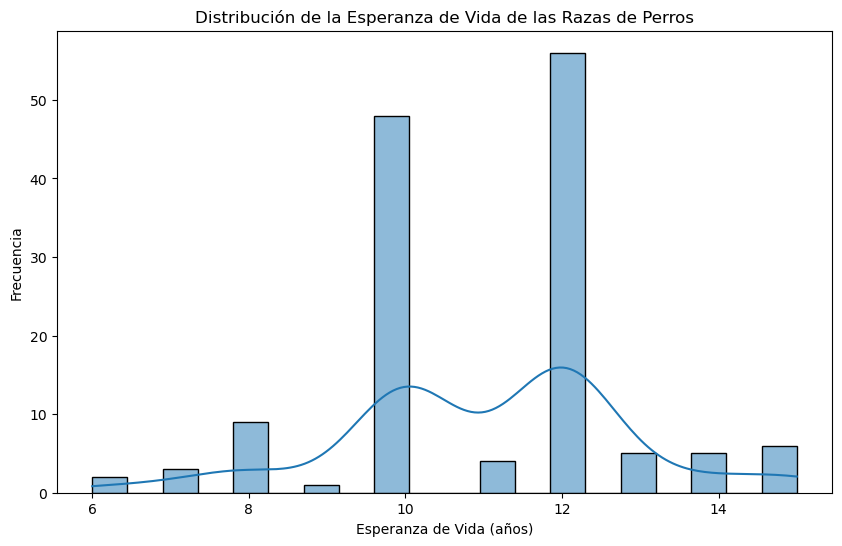

In [169]:
plt.figure(figsize=(10,6))
sns.histplot(df['life_span'],kde=True,bins=20)
plt.title('Distribución de la Esperanza de Vida de las Razas de Perros')
plt.xlabel('Esperanza de Vida (años)')
plt.ylabel('Frecuencia');